In [67]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import mysql.connector

In [52]:
with open("C:\\Users\\shric\\OneDrive - Worcester Polytechnic Institute (wpi.edu)\\Desktop\\DMDD_Assignment_3\\test.json") as f:
     data = json.load(f)

In [53]:
data

[{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False},
 {'userId': 1,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'completed': False},
 {'userId': 1, 'id': 3, 'title': 'fugiat veniam minus', 'completed': False},
 {'userId': 1, 'id': 4, 'title': 'et porro tempora', 'completed': True},
 {'userId': 1,
  'id': 5,
  'title': 'laboriosam mollitia et enim quasi adipisci quia provident illum',
  'completed': False},
 {'userId': 1,
  'id': 6,
  'title': 'qui ullam ratione quibusdam voluptatem quia omnis',
  'completed': False},
 {'userId': 1,
  'id': 7,
  'title': 'illo expedita consequatur quia in',
  'completed': False},
 {'userId': 1,
  'id': 8,
  'title': 'quo adipisci enim quam ut ab',
  'completed': True},
 {'userId': 1,
  'id': 9,
  'title': 'molestiae perspiciatis ipsa',
  'completed': False},
 {'userId': 1,
  'id': 10,
  'title': 'illo est ratione doloremque quia maiores aut',
  'completed': True},
 {'userId': 1,
  'id': 11,
  'title': 'vero rerum

In [54]:
df = pd.DataFrame(columns=["UserID","ID","Title", "Completed"])

In [55]:
for i in range (0, len(data)):
    currentItem = data[i]
    df.loc[i] = [data[i]["userId"], data[i]["id"], data[i]["title"], data[i]["completed"]]

In [56]:
df

,UserID,ID,Title,Completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False
...,...,...,...,...
195,10,196,consequuntur aut ut fugit similique,True
196,10,197,dignissimos quo nobis earum saepe,True
197,10,198,quis eius est sint explicabo,True
198,10,199,numquam repellendus a magnam,True


In [57]:
#connect to mysql servel
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1965",
  database="testdb"
)

print(mydb)

mycursor = mydb.cursor()

In [58]:
# create users table and adding constraints
mycursor.execute("DROP TABLE IF EXISTS user")
mycursor.execute("CREATE TABLE user (userId int PRIMARY KEY, id int, title VARCHAR(255), completed VARCHAR(255))")

In [60]:
# inserting df dataframe in sql user table 
val = list(df.itertuples(index=False,name=None))
sql = "INSERT IGNORE INTO user (userId, id, title, completed) VALUES (%s, %s, %s, %s)"

mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "was inserted.")

10 was inserted.


In [61]:
#show integer objects
df.describe()

,UserID,ID
count,200.000000,200.000000
mean,5.500000,100.500000
std,2.879489,57.879185
min,1.000000,1.000000
25%,3.000000,50.750000
50%,5.500000,100.500000
75%,8.000000,150.250000
max,10.000000,200.000000


In [63]:
df.shape

(200, 4)

In [65]:
df.ID.count()

200

In [66]:
df.UserID.count()

200

In [68]:
#first 5 rows
df.head()

,UserID,ID,Title,Completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False


In [69]:
#last 5 rows
df.tail()

,UserID,ID,Title,Completed
195,10,196,consequuntur aut ut fugit similique,True
196,10,197,dignissimos quo nobis earum saepe,True
197,10,198,quis eius est sint explicabo,True
198,10,199,numquam repellendus a magnam,True
199,10,200,ipsam aperiam voluptates qui,False


In [71]:
#how many rows, columns
df.shape

(200, 4)

In [72]:
#show all columns
df.columns

Index(['UserID', 'ID', 'Title', 'Completed'], dtype='object')

In [75]:
#show unique values of each column
df.nunique()

UserID        10
ID           200
Title        200
Completed      2
dtype: int64

In [78]:
#check unique value for a specific column
df['Completed'].unique()

array([False,  True])

In [80]:
#check if amy column has any null value
df.isnull().sum()

UserID       0
ID           0
Title        0
Completed    0
dtype: int64

In [83]:
#replace any null value
df["Completed"].fillna("False", inplace = True)

In [84]:
#remove some columns from dataset since it is not that important
userRedundantCol = df.drop(['Title'], axis=1)

In [85]:
userRedundantCol.head()

,UserID,ID,Completed
0,1,1,False
1,1,2,False
2,1,3,False
3,1,4,True
4,1,5,False


In [86]:
#relationship analysis
correlation = userRedundantCol.corr()

<AxesSubplot:>

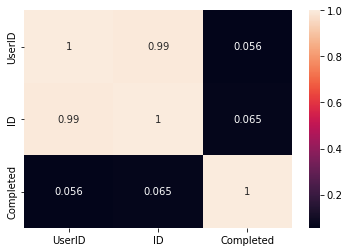

In [88]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot= True)

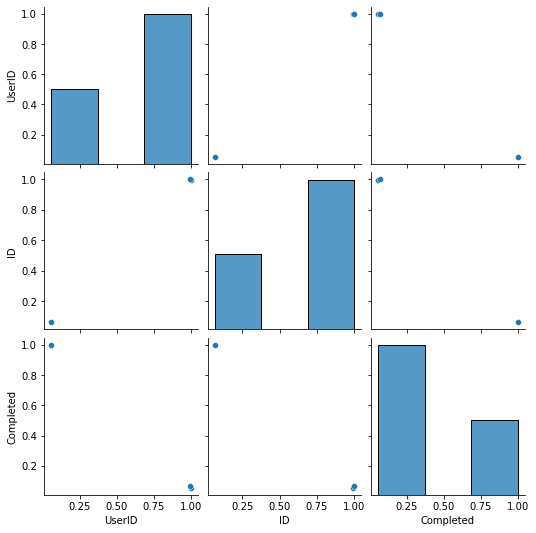

In [89]:
#visualize relation between two variables, each variable in the dataset
sns.pairplot(correlation)

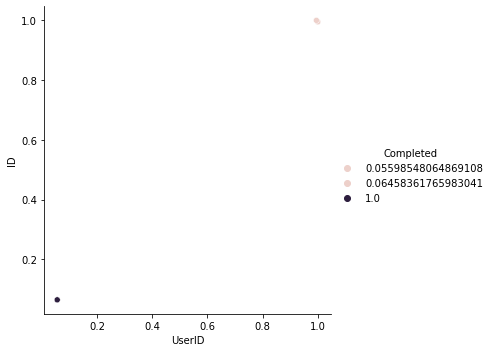

In [90]:
sns.relplot(x= 'UserID', y='ID', hue ='Completed', data=correlation)

C:\Users\shric\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Completed', ylabel='Density'>

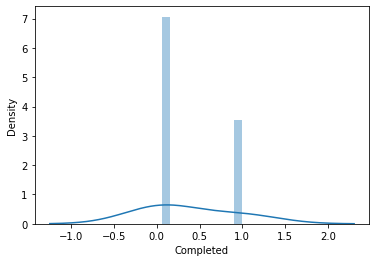

In [95]:
sns.distplot(correlation['Completed'], bins=10)

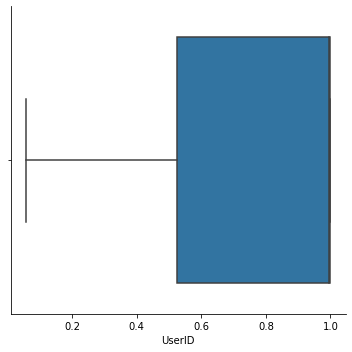

In [97]:
sns.catplot(x='UserID', kind='box', data=correlation)